In [4]:
# Import distinctiveness-R
getwd()
if(!require('igraph')) {
    install.packages('igraph')
    library('igraph')
}
# if(!require('tidyverse')) {
#     install.packages('tidyverse')
#     library('tidyverse')
# }
install.packages("plyr")
library(plyr)
source("distinctiveness/dc.R")

[1] "C:/Users/IV/Desktop/UniPG/distinctiveness-R"


  There is a binary version available but the source version is later:
     binary source needs_compilation
plyr  1.8.6  1.8.8              TRUE

  Binaries will be installed


Warning message:
"package 'plyr' is in use and will not be installed"

Undirected Graphs

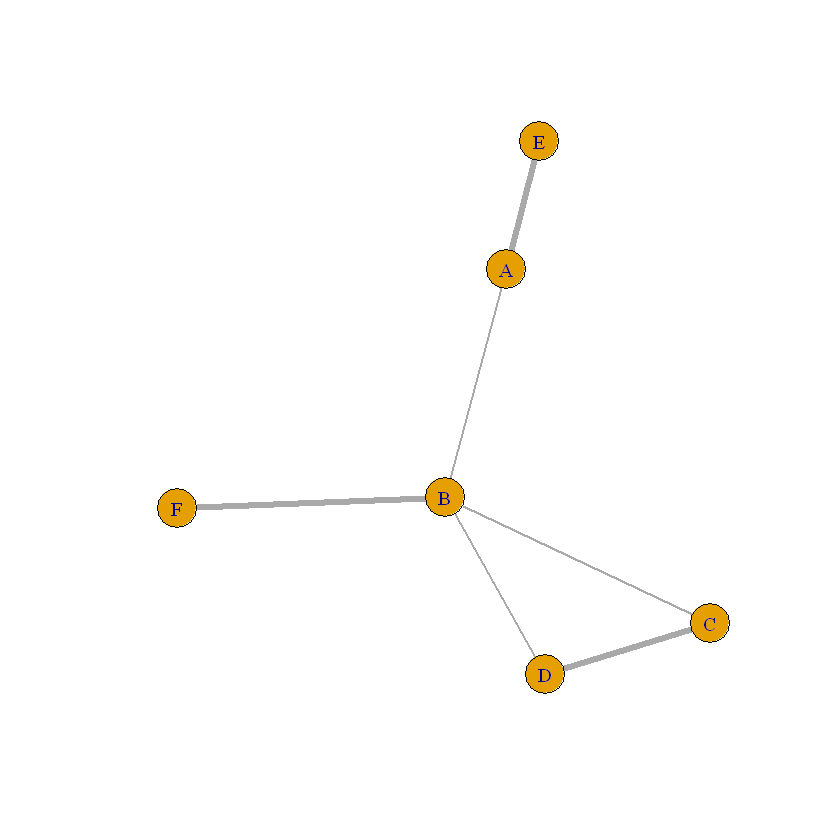

In [5]:
g <- make_empty_graph(directed = FALSE) %>%
  add_vertices(1, name = "A") %>%
  add_vertices(1, name = "B") %>%
  add_vertices(1, name = "C") %>%
  add_vertices(1, name = "D") %>%
  add_vertices(1, name = "E") %>%
  add_vertices(1, name = "F")
g <- g + edge(1, 5, weight = 5) + edge(1, 2, weight = 2) + 
     edge(2, 6, weight = 5) + edge(2, 3, weight = 2) + 
     edge(2, 4, weight = 2) + edge(3, 4, weight = 5)
plot(g, edge.width = E(g)$weight)

In [6]:
d = distinctiveness(g, normalize = FALSE)
d

Node,D1,D2,D3,D4,D5
A,3.6886700,0.79588002,7.255535,5.363636,1.25
B,5.8824901,1.89279003,9.875505,6.714286,2.50
C,2.1835201,0.49485002,4.869929,3.935065,0.75
D,2.1835201,0.49485002,4.869929,3.935065,0.75
E,1.9897000,0.39794001,4.225490,3.571429,0.50
F,0.4845501,0.09691001,2.385606,2.272727,0.25


In [94]:
distinctiveness(g, alpha = 2)

Node,D1,D2,D3,D4,D5
A,2.4845501,0.19382003,6.192577,5.216216,1.0625
B,4.0763101,0.98970004,6.054572,5.827586,1.7500
C,-0.5257499,-0.40823997,2.697727,4.526561,0.3125
D,-0.5257499,-0.40823997,2.697727,4.526561,0.3125
E,0.4845501,0.09691001,3.116246,4.310345,0.2500
F,-2.5257499,-0.50514998,1.041380,3.378378,0.0625


In [8]:
distinctiveness(g, alpha = list(1, 2, 3, 4, 5))

Node,D1,D2,D3,D4,D5
A,3.6886700,0.19382003,4.9509584,5.047548,1.0009765625
B,5.8824901,0.98970004,1.9421890,5.149766,1.0937500000
C,2.1835201,-0.40823997,0.1797458,4.922743,0.0322265625
D,2.1835201,-0.40823997,0.1797458,4.922743,0.0322265625
E,1.9897000,0.09691001,1.8398839,4.875195,0.0312500000
F,0.4845501,-0.50514998,-0.3786036,4.643388,0.0009765625


In [12]:
d = distinctiveness(g, alpha = 2, measures = c("D1"), normalize = TRUE)
d

Node,D1,D2,D3,D4,D5
A,0.5710918,NaN,NaN,NaN,NaN
B,0.6166376,NaN,NaN,NaN,NaN
C,0.4849564,NaN,NaN,NaN,NaN
D,0.4849564,NaN,NaN,NaN,NaN
E,0.5138647,NaN,NaN,NaN,NaN
F,0.4277294,NaN,NaN,NaN,NaN


Directed Graphs

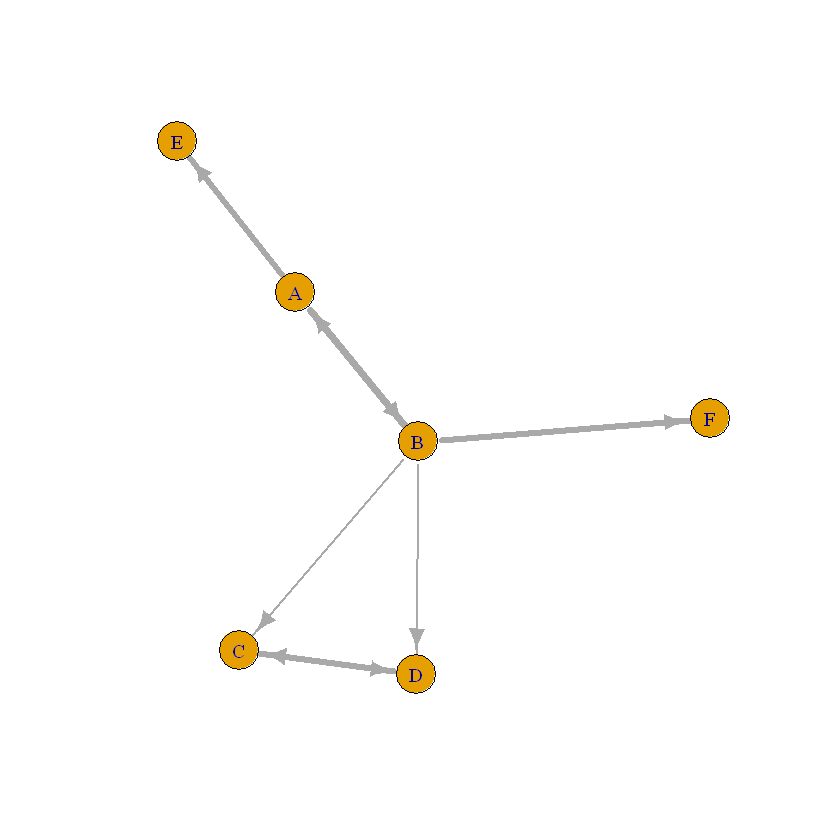

In [15]:
g_dir <- make_empty_graph(directed = TRUE) %>%
  add_vertices(1, name = "A") %>%
  add_vertices(1, name = "B") %>%
  add_vertices(1, name = "C") %>%
  add_vertices(1, name = "D") %>%
  add_vertices(1, name = "E") %>%
  add_vertices(1, name = "F")
g_dir <- g_dir + edge(1, 5, weight = 5) + edge(1, 2, weight = 6) +
  edge(2, 1, weight = 2) + edge(2, 6, weight = 5) + edge(2, 3, weight = 2) +
  edge(2, 4, weight = 2) + edge(3, 4, weight = 3) + edge(4, 3, weight = 5)
plot(g_dir, edge.width = E(g_dir)$weight)

In [16]:
dc = distinctiveness(g_dir, alpha = 2, normalize = FALSE)
dc

Node,D1_IN,D2_IN,D3_IN,D4_IN,D5_IN,D1_OUT,D2_OUT,D3_OUT,D4_OUT,D5_OUT
A,-1.0103000,-0.50514998,-0.1087153,0.2162162,0.0625,7.6886700,1.39794001,16.248334,11.000000,2.00
B,0.5814601,0.09691001,0.3728874,3.5409836,0.2500,5.2804301,1.59176003,11.418387,7.891247,2.50
C,2.4845501,0.19382003,7.2768909,5.2162162,1.0625,0.2907300,0.09691001,2.334454,2.076923,0.25
D,1.0866101,0.19382003,4.3226484,3.2162162,1.0625,0.4845501,0.09691001,3.890756,4.310345,0.25
E,0.4845501,0.09691001,-0.4554023,2.0491803,0.2500,0.0000000,0.00000000,0.000000,0.000000,0.00
F,-2.5257499,-0.50514998,1.8158895,3.3783784,0.0625,0.0000000,0.00000000,0.000000,0.000000,0.00
